In [27]:
# Externals
import pickle
import numpy as np
from PIL import *
import cv2
import glob
import matplotlib.pyplot as plt

In [ ]:
def load_imagenet_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f)
    print(batch)
    data = batch['data']
    labels = batch['labels']
    # Assuming data needs to be reshaped to a 3D format (e.g., 32x32x3 for CIFAR-10 like structure)
    # You would need to know the original dimensions and color depth (e.g., RGB) of the images.
    # For example, if images are 32x32 with 3 channels, you might reshape as follows:
    # data = data.reshape((len(data), 3, 32, 32)).transpose(0, 2, 3, 1) for channel-last format
    return data, labels

# Example usage:
data, labels = load_imagenet_batch('train/train_data_batch_1')

{'data': array([[ 34,  48,  80, ..., 194, 192, 188],
       [  1,   1,   1, ...,   6,   6,   5],
       [  3,   4,   5, ...,  47,  45,  39],
       ...,
       [ 27,  33,  50, ..., 127, 126, 129],
       [119, 125, 128, ..., 185, 177, 153],
       [  4,   5,   5, ...,   5,   5,   5]], dtype=uint8), 'mean': array([118.45995643, 119.56469453, 120.35390702, ..., 100.14106046,
        99.72706603,  99.14217975]), 'labels': [572, 958, 785, 153, 851, 255, 589, 232, 531, 409, 83, 665, 565, 920, 7, 694, 335, 86, 581, 824, 266, 348, 265, 693, 584, 906, 699, 497, 833, 711, 68, 859, 736, 874, 460, 12, 657, 636, 647, 194, 185, 801, 301, 826, 81, 868, 704, 391, 167, 907, 56, 127, 674, 415, 286, 242, 279, 58, 428, 173, 874, 601, 863, 112, 386, 986, 148, 780, 924, 811, 897, 121, 326, 677, 259, 248, 123, 19, 561, 258, 8, 524, 206, 286, 42, 56, 705, 851, 534, 626, 935, 491, 287, 975, 722, 39, 636, 998, 744, 601, 293, 128, 288, 202, 527, 355, 408, 302, 751, 242, 965, 192, 924, 777, 327, 642, 251, 601, 6

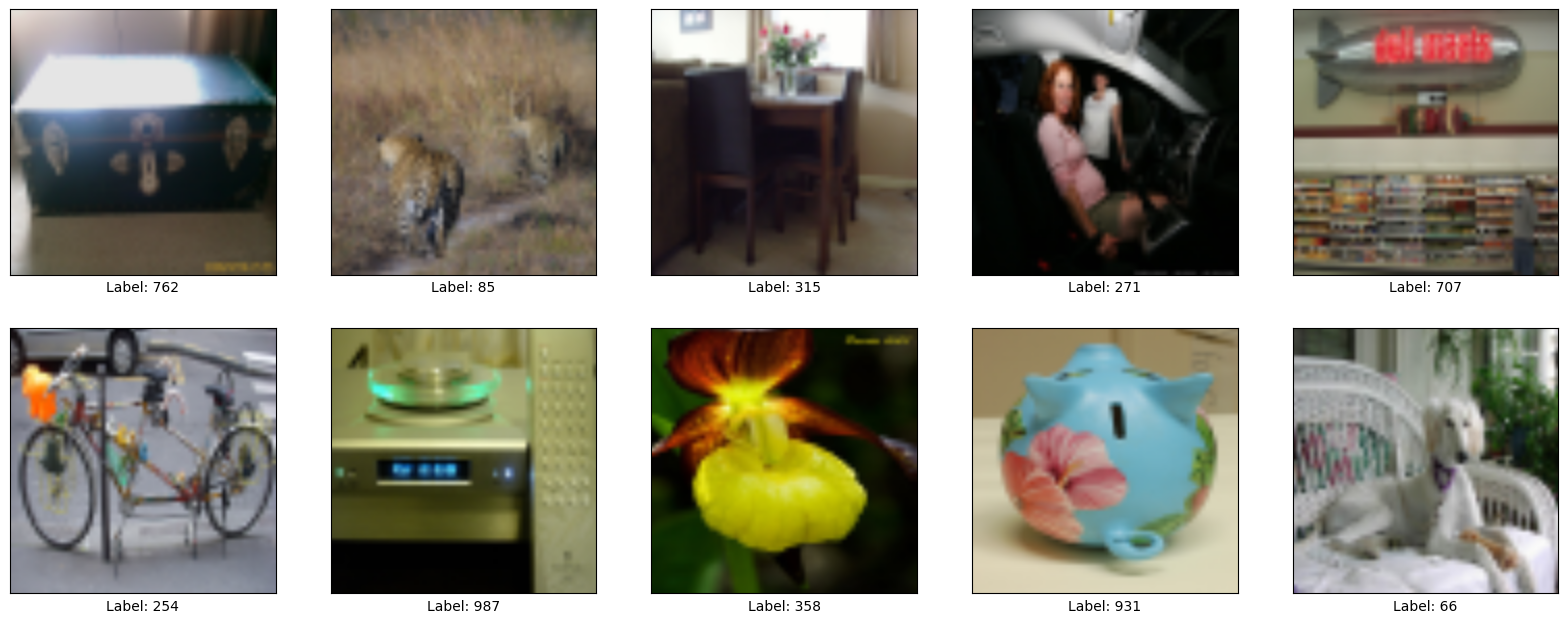

In [33]:
def visualize_and_upscale_images(images, labels, upscale_factor=4, num_images=10):
    plt.figure(figsize=(20, 20))
    
    for i in range(num_images):
        idx = np.random.randint(0, len(images))
        img_flat = images[idx]
        
        # Splitting into channels
        red_channel = img_flat[0:4096].reshape(64, 64)
        green_channel = img_flat[4096:4096*2].reshape(64, 64)
        blue_channel = img_flat[4096*2:4096*3].reshape(64, 64)
        
        # Stacking the channels
        img_rgb = np.stack((red_channel, green_channel, blue_channel), axis=-1)
        
        # Upscaling the image
        upscaled_img = cv2.resize(img_rgb, (0,0), fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_LINEAR)
        
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(upscaled_img)
        plt.xlabel(f'Label: {labels[idx]}')
    plt.show()

# Visualize and upscale images
visualize_and_upscale_images(data, labels)

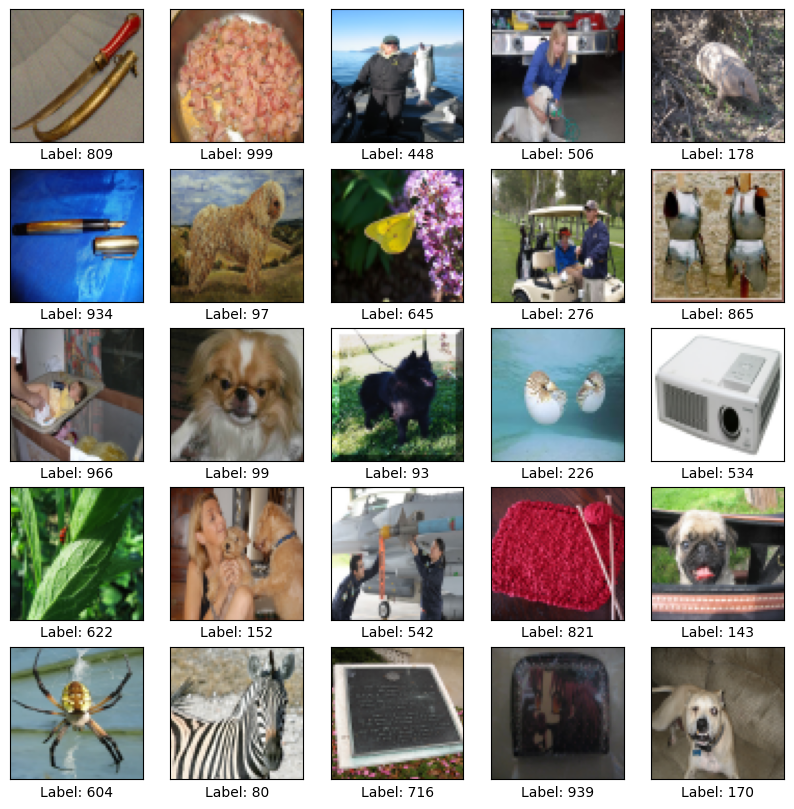

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to reshape and visualize images
def visualize_images(images, labels, num_images = 25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        idx = np.random.randint(0, len(images))
        img_flat = images[idx]
        
        # Split the flat array into three parts, each corresponding to a color channel
        red_channel = img_flat[0:4096].reshape(64, 64)
        green_channel = img_flat[4096:4096*2].reshape(64, 64)
        blue_channel = img_flat[4096*2:4096*3].reshape(64, 64)
        
        # Stack the channels to get the RGB image
        img_rgb = np.stack((red_channel, green_channel, blue_channel), axis=-1)
        
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img_rgb)  # Display the RGB image
        plt.xlabel(f'Label: {labels[idx]}')
    plt.show()

# Assuming train_images and train_labels are already defined
visualize_images(data, labels)